### Tasks
1. Create a classification model using SVM for the voice.csv data. 
2. Create a Multinomial Naive Bayes classification model with the following conditions:
    1. Use the spam.csv data.
    2. Utilize CountVectorizer with stop words enabled.
    3. Evaluate the results.
3. Create another Multinomial Naive Bayes classification model with the following conditions:
    1. Use the spam.csv data.
    2. Employ TF-IDF features with stop words enabled.
    3. Evaluate the results and compare them with the results from Task #2.
    4. Provide a conclusion on which feature extraction method is best for the spam.csv dataset.

#### 1. Create a classification model using SVM for the voice.csv data.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [8]:
# Import file
data = pd.read_csv('../dataset/voice.csv', encoding='latin-1') # spesifiksi encoding␣

data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [11]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


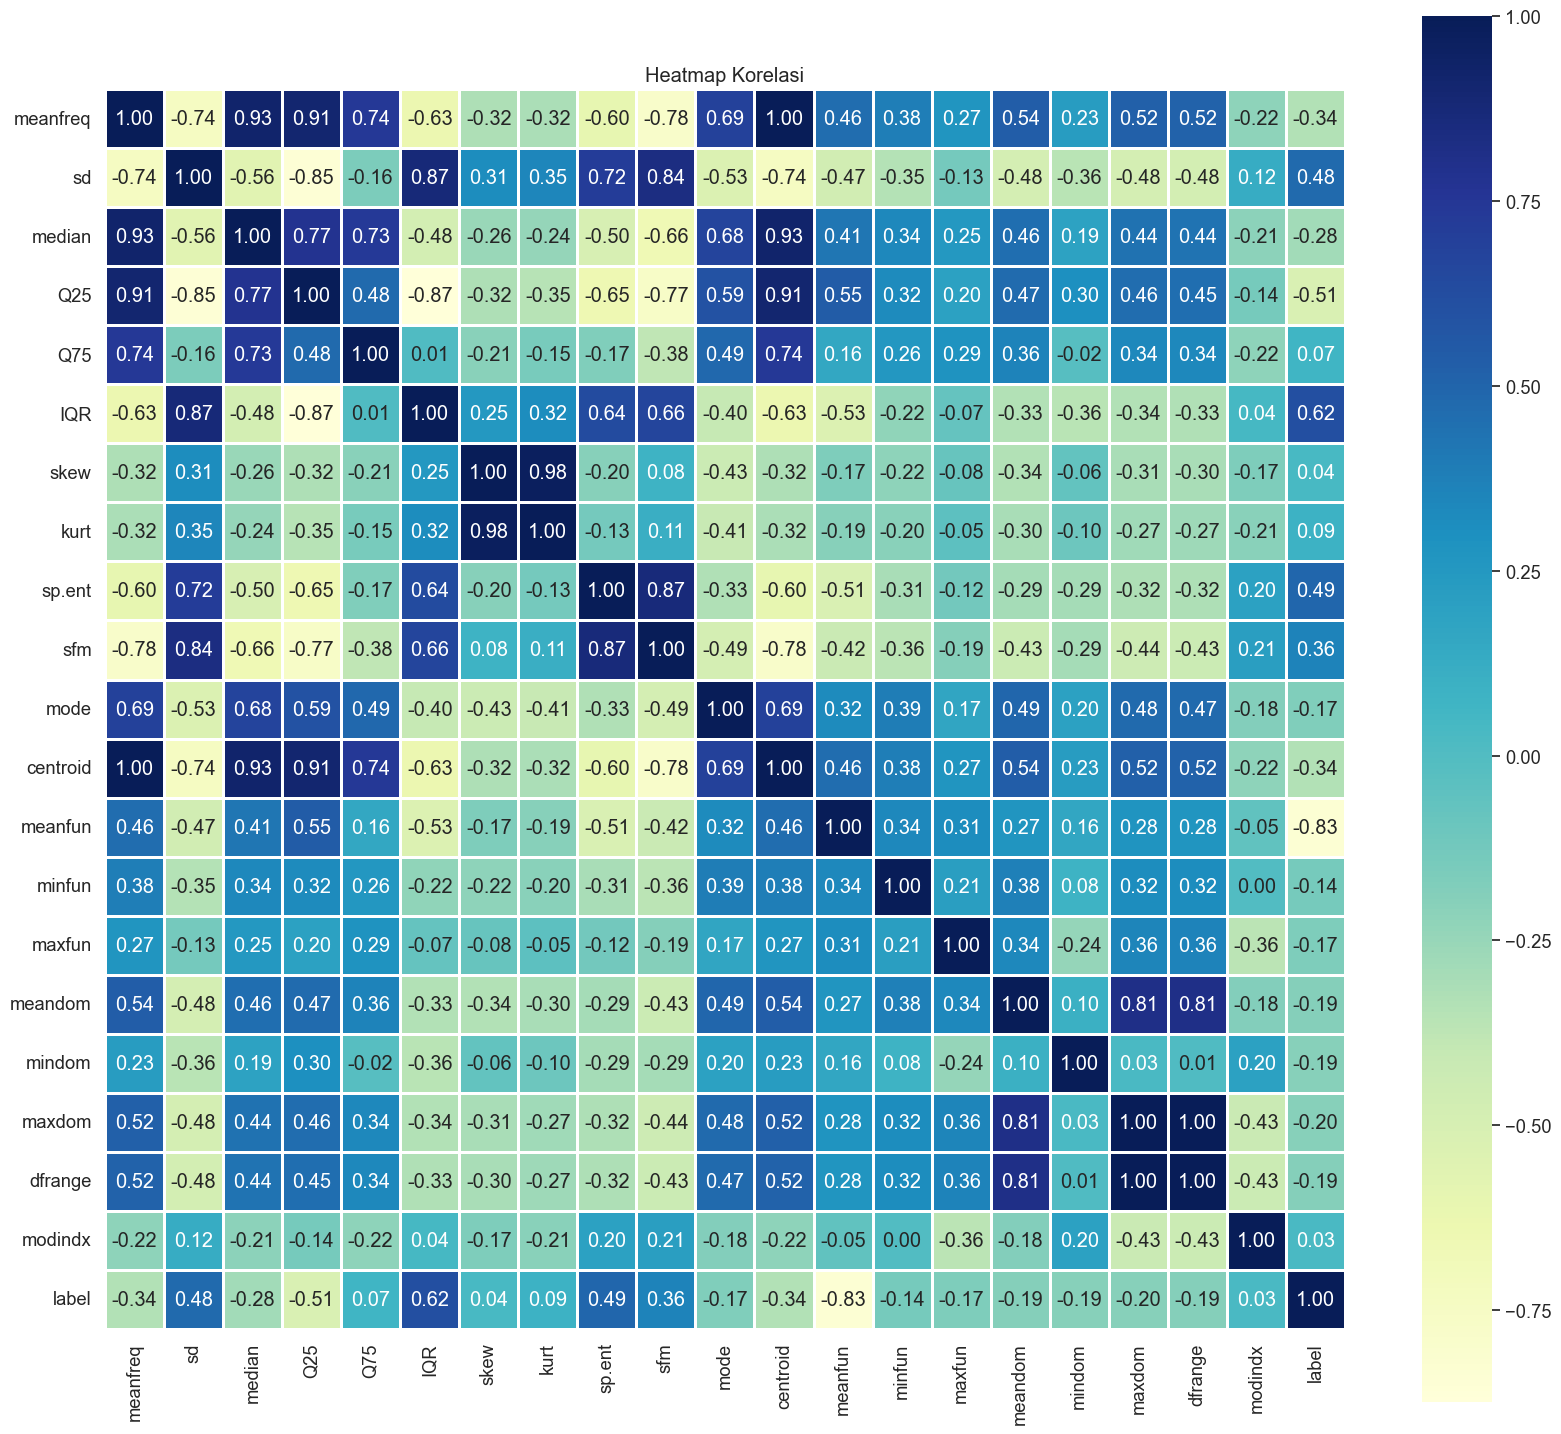

In [16]:
plt.figure(figsize=(20, 18))
corr_matrix = data.corr()
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, cmap='YlGnBu', linewidths=1, fmt=".2f", annot=True, cbar=True, square=True)
plt.title('Heatmap Korelasi')
plt.show()

In [17]:
from sklearn.svm import SVC
from sklearn import metrics
svc = SVC()
svm_classifier = SVC(kernel='linear')

In [18]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(['label'], axis=1))
scaled_features

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

In [20]:
from sklearn.model_selection import train_test_split
X = scaled_features
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1000)

In [21]:
 svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
from sklearn.metrics import accuracy_score, classification_report
# Memprediksi label pada data uji
svm_model = SVC(kernel='linear', C=5)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
svc.fit(X_train, y_train)
# Menghitung Akurasi
y_pred = svc.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {int(accuracy * 100)}%')
# Membuat Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy Score: 98%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       299
           1       0.98      0.99      0.99       335

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



#### 2. Create a Multinomial Naive Bayes classification model with the following conditions:
    1. Use the spam.csv data.
    2. Utilize CountVectorizer with stop words enabled.
    3. Evaluate the results.

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
data_spam = pd.read_csv("../dataset/spam.csv", encoding="latin-1")
data_spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [35]:
data_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [36]:
data_spam.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [37]:
data_spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [38]:
X = data_spam["v2"]
y = data_spam["v1"]

In [39]:
df = data_spam[['v1', 'v2']]
df.columns = ['Labels', 'SMS']

In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
df['Labels'] = df['Labels'].map({'spam': 1, 'ham': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10784\753552247.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Labels'] = df['Labels'].map({'spam': 1, 'ham': 0})


In [41]:
X = df['SMS']
y = df['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
# Create a CountVectorizer with stop words enabled
vectorizer = CountVectorizer(stop_words="english")

# Fit and transform the training data
X_train_counts = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_counts = vectorizer.transform(X_test)

In [43]:
# Create and train a Multinomial Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_counts, y_train)

MultinomialNB()

In [44]:
# Predict on the test set
y_pred = naive_bayes.predict(X_test_counts)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(f'Accuracy : {int(accuracy * 100)}%')

# Print classification report
report = classification_report(y_test, y_pred)
print('Classification Report:', report)

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9838565022421525
Accuracy : 98%
Classification Report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
[[959   6]
 [ 12 138]]


#### 3. Create another Multinomial Naive Bayes classification model with the following conditions:
    1. Use the spam.csv data.
    2. Employ TF-IDF features with stop words enabled.
    3. Evaluate the results and compare them with the results from Task #2.
    4. Provide a conclusion on which feature extraction method is best for the spam.csv dataset.

In [45]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [52]:
data_spam = pd.read_csv("../dataset/spam.csv", encoding="latin-1")
data_spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [54]:
df = data_spam[['v1', 'v2']]
df.columns = ['Labels', 'SMS']

In [55]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
df['Labels'] = df['Labels'].map({'spam': 1, 'ham': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10784\753552247.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Labels'] = df['Labels'].map({'spam': 1, 'ham': 0})


In [56]:
X = df['SMS']
y = df['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Create a TfidfVectorizer with stop words enabled
tfidf_vectorizer = TfidfVectorizer(stop_words="english")

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [58]:
# Create and train a Multinomial Naive Bayes classifier
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [59]:
# Make predictions on the test data using TF-IDF features
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

# Evaluate the TF-IDF model
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print('Accuracy using TF-IDF:', accuracy_tfidf)
confusion_tfidf = confusion_matrix(y_test, y_pred_tfidf)
print('Confusion Matrix using TF-IDF:', confusion_tfidf)
report_tfidf = classification_report(y_test, y_pred_tfidf)
print('Classification Report using TF-IDF:', report_tfidf)

Accuracy using TF-IDF: 0.9668161434977578
Confusion Matrix using TF-IDF: [[965   0]
 [ 37 113]]
Classification Report using TF-IDF:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In this comparison, we found that using CountVectorizer with stop words enabled is slightly better than using TF-IDF with stop words for spam classification. It gives us higher accuracy and better performance when identifying spam messages.

However, it's worth mentioning that the choice between these methods can depend on the specific dataset and the machine learning model you're using. Different datasets and models may lead to different outcomes, so it's a good idea to try both approaches and see which one works best for your particular situation. Experimentation is key to finding the most effective method for your spam classification task.